In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
whole_data = pd.read_csv("diamonds.csv")
data = whole_data.sample(frac=0.7, random_state=42)
data.reset_index(drop=True, inplace=True)
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1389,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,50053,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
2,41646,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
3,42378,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
4,17245,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [3]:
data.shape

(37758, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37758 non-null  int64  
 1   carat       37758 non-null  float64
 2   cut         37758 non-null  object 
 3   color       37758 non-null  object 
 4   clarity     37758 non-null  object 
 5   depth       37758 non-null  float64
 6   table       37758 non-null  float64
 7   price       37758 non-null  int64  
 8   x           37758 non-null  float64
 9   y           37758 non-null  float64
 10  z           37758 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


In [5]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.797093,61.753851,57.446679,3920.780179,5.728988,5.732791,3.538253
std,0.473679,1.436114,2.245654,3979.854843,1.122161,1.154764,0.710208
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5306.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(37745, 10)

In [7]:
label_data = data.copy()
label_encoder = LabelEncoder()
object_cols = ["cut", "color", "clarity"]
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,2,3,6,62.1,56.0,559,3.97,4.00,2.47
1,0.58,4,2,7,60.0,57.0,2201,5.44,5.42,3.26
2,0.40,2,1,7,62.1,55.0,1238,4.76,4.74,2.95
3,0.43,3,1,7,60.8,57.0,1304,4.92,4.89,2.98
4,1.55,2,1,3,62.3,55.0,6901,7.44,7.37,4.61


<Axes: >

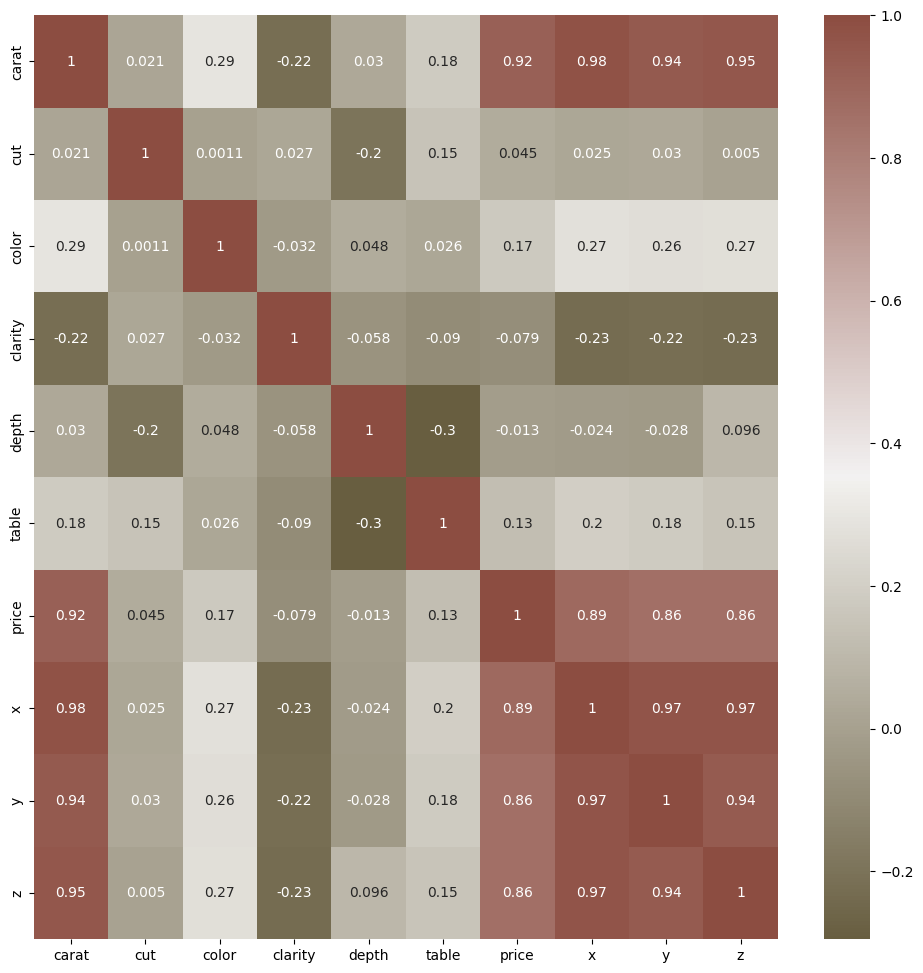

In [8]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [9]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [10]:
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor())

In [11]:
param_distributions = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__bootstrap': [True, False]
}

In [12]:
random_search = RandomizedSearchCV(pipeline_rf, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [13]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [17]:
best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

In [18]:
rf_pred = best_model_rf.predict(X_test)

In [19]:
metrics.mean_squared_error(y_test, rf_pred)

325093.9285347988

In [20]:
param_distributions = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 4, 5],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__min_child_weight': [1, 3, 5],
    'xgbregressor__gamma': [0, 0.1, 0.3],
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.6, 0.8, 1.0]
}

In [21]:
pipeline_xgb = make_pipeline(StandardScaler(), XGBRegressor())

In [22]:
random_search = RandomizedSearchCV(pipeline_xgb, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [23]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=N...
                   param_distributions={'xgbregressor__colsample_bytree': [0.6,
                                                                           0.8,
                                                                           1.0],
                                        'xgbregressor__gamma': [0, 0.1, 0.3],
                                        'xgbregressor__learning_rate': [0.01,
                                                                        0.05,
                                                                        0.1],
                                        'xgbregressor__max_depth': [3, 4, 5],
                                        'xgbregressor__min_child_weight': [1, 3,
                                                                           5],
                                        'xgbregressor__n_estimators': [100, 200,
                                                                       300],
                                        'xgbregressor__subsample': [0.6, 0.8,
                                                                    1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [24]:
best_params_xgb = random_search.best_params_
best_model_xgb = random_search.best_estimator_

In [25]:
xgb_pred = best_model_xgb.predict(X_test)

In [26]:
metrics.mean_squared_error(y_test, xgb_pred)

314709.3817995996

In [27]:
print("R^2:",metrics.r2_score(y_test, xgb_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, xgb_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, xgb_pred))
print("MSE:",metrics.mean_squared_error(y_test, xgb_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

R^2: 0.9802584794846252
Adjusted R^2: 0.9802396321647314
MAE: 291.6878581231487
MSE: 314709.3817995996
RMSE: 560.9896450021156
